In [2]:
import simpy
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

sns.set_palette(sns.color_palette("Set2"))
sns.set(rc={'figure.figsize':(10,8)}, style="white", color_codes=True)

<h2 style="text-align: center; font-size: 30px; text-align: center; margin-bottom: 40px;">Trabajo Práctico 2</h2>

<div style="border: 1px solid #d2d2d2; border-top: none; border-radius: 8px; margin-bottom: 40px;">
    <h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #38a2ad; color: #fff; border-radius: 4px; margin-bottom: 20px; margin-top: 0; border-bottom-left-radius: 0;  border-bottom-right-radius: 0;">Alumnos</h2>
    <div style="width: 450px; margin: 0 auto 30px;">
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Nombre y Apellido</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Padrón</p>
            </div>
        </div>
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Maria Florencia Prado</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">96626</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; background-color: #f4f4f4;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Risaro Lucas</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">94335</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Scoccimarro Maximiliano</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">93784</p>
            </div>
        </div>
    </div>
</div>

<h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #db2e2e; color: #fff; border-radius: 4px; margin-bottom: 30px;">Grupo 4</h2>

# Procesos de Poisson

### Ejercicio 1

Utilizando Matlab, Octave o Python simule el siguiente sistema.

Se está diseñando un web service, el cual cada vez que es invocado consulta a una base de datos.

Se estima que el tiempo que transcurre entre cada llamada al servicio se puede modelar según una distribución exponencial con media $\mu = 4$ *segundos*

Se debe decidir la arquitectura de base de datos a utilizar entre las dos siguientes:

1) Utilizar 2 bases de datos distribuidas.

Con probabilidad $p = 0.6$ las solicitudes son atendidas por la base 1 y con probabilidad $q=1-p$ son atendidos por la base de datos 2.

El tiempo que demora cada base de datos en atender una solicitud sigue una distribución exponencial con medias,  $\mu_1 = 0.7$ *segundos* y $\mu_1 = 1$ *segundos* respectivamente.

2) Utilizar 1 base de datos central. 

En este caso la demora en resolver una solicitud sigue una distribución exponencial con $\mu = 0.8$ *segundos*

Simular para cada opción 100000 solicitudes procesadas, determinando:
  * El tiempo medio de espera entre que la solicitud llega y puede ser procesada (suponer que ninguna conexión se cae por timeout).
  * La fracción de las solicitudes que no esperaron para ser procesadas. 
  * La opción 1 es más costosa que la segunda opción y la empresa sólo acepta realizar la inversión si el tiempo medio que demora en resolver cada solicitud (tiempo en fila + tiempo de procesamiento) es como mínimo 50% menor que la opción 2. ¿Qué solución le recomienda?

In [3]:
def serviceCall():
  return np.random.exponential(1/4)

def distributedDBProcessTime():
  if (np.random.rand() <= 0.6):
    return np.random.exponential(10/7)
  else:
    return np.random.exponential(1)

def centralDBProcessTime():
  return np.random.exponential(10/8)
  
def meanInstantProcessedServiceCalls(waitTimes):
  return waitTimes.count(0) / len(waitTimes)

def simulateWaitTimes(processFn, times):
  serviceCallTime = 0
  readyAtTime = 0
  waits = list()
  solves = list()

  for i in range(0, times):
    serviceCallTime += serviceCall()
    processTime = processFn()
    waitTime = readyAtTime - serviceCallTime

    if (waitTime > 0):
      waits.append(waitTime)
      solves.append(waitTime + processTime)
    else:
      waits.append(0)
      solves.append(processTime)

    readyAtTime = serviceCallTime + processTime

  return { "waitTimes": waits, "solveTimes": solves }

def getTimeDiffPercent(t1, t2):
  wt1 = np.mean(t1)
  wt2 = np.mean(t2)
  return wt1*100/wt2

distributedTimes = simulateWaitTimes(distributedDBProcessTime, 100000)
centralTimes = simulateWaitTimes(centralDBProcessTime, 100000)

print('Tiempo medio de espera - 2 bases de datos distribuidas', np.mean(distributedTimes["waitTimes"]))
print('Tiempo medio de espera - 1 base de datos central', np.mean(centralTimes["waitTimes"]))

print('Fracción de solicitudes que no esperaron para ser procesadas - 2 bases de datos distribuidas', meanInstantProcessedServiceCalls(distributedTimes["waitTimes"]))
print('Fracción de solicitudes que no esperaron para ser procesadas - 1 base de datos central', meanInstantProcessedServiceCalls(centralTimes["waitTimes"]))

print('Tiempo medio de resolucion - 2 bases de datos distribuidas', np.mean(distributedTimes["solveTimes"]))
print('Tiempo medio de resolucion - 1 base de datos central', np.mean(centralTimes["solveTimes"]))

td = getTimeDiffPercent(distributedTimes["solveTimes"], centralTimes["solveTimes"])
print('La opcion de 2 bases de datos distribuidas es', td, '% de la opcion de 1 base de datos central')
if (td >= 50):
  print('Por lo tanto recomiendo la opcion de 1 base de datos central')
else:
  print('Por lo tanto recomiendo la opcion de 2 bases de datos distribuidas')



Tiempo medio de espera - 2 bases de datos distribuidas 1.0422064397294044
Tiempo medio de espera - 1 base de datos central 1.0447831456696755
Fracción de solicitudes que no esperaron para ser procesadas - 2 bases de datos distribuidas 0.17041
Fracción de solicitudes que no esperaron para ser procesadas - 1 base de datos central 0.16531
Tiempo medio de resolucion - 2 bases de datos distribuidas 2.2915311820458473
Tiempo medio de resolucion - 1 base de datos central 2.297622712131276
La opcion de 2 bases de datos distribuidas es 99.73487683363915 % de la opcion de 1 base de datos central
Por lo tanto recomiendo la opcion de 1 base de datos central


# Cadenas de Markov

### Ejercicio 2

Un servidor recibe solicitudes las cuales son procesadas de una por vez en el orden de llegada (política FIFO).

Se determinó que en 10 *milisegundos* existe una probabilidad $p = \frac{1}{40}$ que llegue una nueva solicitud y una probabilidad $q = \frac{1}{30}$ que una solicitud termine de ser procesada y deje el sistema.

Se desea estudiar la cantidad de solicitudes en el servidor considerando tanto las que están en cola esperando ser procesadas como la solicitud que está siendo procesada.

1)  Determine la matriz de transición de estados explicando cómo se obtiene la misma.

2)  Utilizando Matlab, Octave o Python simule la evolución del sistema a lo largo de 1.000 segundos. Suponga que el sistema puede tener como máximo 30 estados posibles y que el servidor comienza sin estar procesando solicitudes.

3)  Realice un gráfico mostrando la cantidad de solicitudes en el servidor en cada instante de tiempo.

4)  Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado.

5)  Determine el % de tiempo que el servidor se encuentra sin procesar solicitudes.

---

**3 estados**

1) Esperando

2) Arribo Solicitud

3) Termina Proceso Solicitud

\begin{equation*}
\mathbf{P}=  \begin{vmatrix}
p_{11} &  p_{12} & p_{13} \\
p_{21} &  p_{22} & p_{23} \\
p_{31} &  p_{32} & p_{33}
\end{vmatrix} = \begin{vmatrix}
\frac{113}{120} & \frac{1}{40} & \frac{1}{30} \\
1 &  0 & 0 \\
1 &  0 & 0
\end{vmatrix}
\end{equation*}

In [4]:
p = np.matrix([[113/120, 1/40, 1/30], [1, 0, 0], [1, 0, 0]])
stateChangeQ = round((1000 * 1000) / 10)

# Empieza esperando
currentState = [1, 0, 0]
stateCount = [0, 0, 0]
solCount = 0
stateNum = 1
solTime = 0
stateChangeCount = 0
for i in range(0, stateChangeQ):
  print('En estado ', stateNum, ':')
  stateCount[stateNum-1] += 1
  print(solCount, ' solicitudes en cola a los ', i*10, ' milisegundos')
  d = np.matmul(currentState, p**(i+1))
  probValues = d.tolist()[0]
  prob = np.random.uniform(0, 1)
  # print(probValues)
  prevStateNum = stateNum
  if (prob <= probValues[0]):
    stateNum = 1
    currentState = [1, 0, 0]
    solTime += 10
  elif (prob <= (probValues[0] + probValues[1])):
    stateNum = 2
    currentState = [0, 1, 0]
    solCount += 1
    solTime += 10
  else:
    stateNum = 3
    currentState = [0, 0, 1]
    if (solCount > 0):
      solCount -= 1
  print('')
  if (prevStateNum != stateNum):
    stateChangeCount += 1
  if (stateChangeCount == 30):
    print('Se llego al limite de cambios de estado posibles (30)')
    print('Cantidad de veces en cada estado', stateCount)
    print('Porcentaje de tiempo que el servidor no procesa solicitudes ', (solTime / ((i+10)*10))*100, '%')
    break
if (stateChangeCount < 30):
  print('Cantidad de veces en cada estado', stateCount)
  print('Porcentaje de tiempo que el servidor no procesa solicitudes ', (solTime / (stateChangeQ*10))*100, '%')

En estado  1 :
0  solicitudes en cola a los  0  milisegundos

En estado  1 :
0  solicitudes en cola a los  10  milisegundos

En estado  1 :
0  solicitudes en cola a los  20  milisegundos

En estado  1 :
0  solicitudes en cola a los  30  milisegundos

En estado  1 :
0  solicitudes en cola a los  40  milisegundos

En estado  1 :
0  solicitudes en cola a los  50  milisegundos

En estado  1 :
0  solicitudes en cola a los  60  milisegundos

En estado  1 :
0  solicitudes en cola a los  70  milisegundos

En estado  1 :
0  solicitudes en cola a los  80  milisegundos

En estado  1 :
0  solicitudes en cola a los  90  milisegundos

En estado  1 :
0  solicitudes en cola a los  100  milisegundos

En estado  1 :
0  solicitudes en cola a los  110  milisegundos

En estado  1 :
0  solicitudes en cola a los  120  milisegundos

En estado  1 :
0  solicitudes en cola a los  130  milisegundos

En estado  1 :
0  solicitudes en cola a los  140  milisegundos

En estado  1 :
0  solicitudes en cola a los  150  m


En estado  1 :
0  solicitudes en cola a los  1650  milisegundos

En estado  1 :
0  solicitudes en cola a los  1660  milisegundos

En estado  1 :
0  solicitudes en cola a los  1670  milisegundos

En estado  1 :
0  solicitudes en cola a los  1680  milisegundos

En estado  1 :
0  solicitudes en cola a los  1690  milisegundos

En estado  1 :
0  solicitudes en cola a los  1700  milisegundos

En estado  1 :
0  solicitudes en cola a los  1710  milisegundos

En estado  1 :
0  solicitudes en cola a los  1720  milisegundos

En estado  1 :
0  solicitudes en cola a los  1730  milisegundos

En estado  1 :
0  solicitudes en cola a los  1740  milisegundos

En estado  1 :
0  solicitudes en cola a los  1750  milisegundos

En estado  1 :
0  solicitudes en cola a los  1760  milisegundos

En estado  1 :
0  solicitudes en cola a los  1770  milisegundos

En estado  1 :
0  solicitudes en cola a los  1780  milisegundos

En estado  1 :
0  solicitudes en cola a los  1790  milisegundos

En estado  1 :
0  solici

# Sistemas Dinámicos

### Ejercicio 3

Se tiene un sistema el cual depende de 3 variables y se puede suponer discreto en el tiempo. Su comportamiento está regido por las siguientes reglas:

<h4 align="center">
$2x_t = x_{t-1} + 2 y_{t-1}$
</h4>
<h4 align="center">
$y_t = y_{t-1} - \frac{x_{t-1}}{2}$
</h4>
<h4 align="center">
$z_t = z_{t-1} - (x_{t-1} + y_{t-1})$
</h4>

* Determine el o los puntos de equilibrio del sistema.
* Grafique el diagrama de fases mostrando 100 iteraciones del sistema considerando como puntos de inicio todos
los puntos que se puede formar con:
<h4 align="center">
$x_0 =  \text{-1, 0 y 1}$
</h4>
<h4 align="center">
$y_0 =  \text{-1, 0 y 1}$
</h4>
<h4 align="center">
$z_0 =  \text{-1, 0 y 1} $
</h4>

---

Primero buscamos los puntos de equilibrio:

<h4 align="center">
$2x_{eq} = x_{eq} + 2 y_{eq}$
</h4>
<h4 align="center">
$y_{eq} = y_{eq} - \frac{x_{eq}}{2}$
</h4>
<h4 align="center">
$z_{eq} = z_{eq} - (x_{eq} + y_{eq})$
</h4>

Reemplazando:

<h4 align="center">
$2x_{eq} = x_{eq} + 2 y_{eq}$
</h4>
<h4 align="center">
$y_{eq} = y_{eq} - \frac{x_{eq}}{2}$
</h4>
<h4 align="center">
$z_{eq} = z_{eq} - x_{eq} - y_{eq}$
</h4>

<h4 align="center">
$x_{eq} = 2 y_{eq}$
</h4>
<h4 align="center">
$x_{eq} = 0, \quad y_{eq} = 0$
</h4>

Por lo tanto, los puntos de equilibrio del sistema son:

<h4 align="center">
$(x_{eq},y_{eq},z_{eq}) = (0, 0, z_{eq}) \quad \forall  z_{eq} \in \Re$
</h4>

In [5]:
xs = list()
ys = list()
zs = list()

def dinSystem(p, times):
    o = p
    for i in range(0, times):
        x = (o[0] + 2*o[1]) / 2
        y = o[1] - o[0]/2
        z = o[2] - o[0] - o[1]
        o = [x, y, z]
        xs.append(x)
        ys.append(y)
        zs.append(z)

x = [-1, 0, 1]
y = [-1, 0, 1]
z = [-1, 0, 1]

points = list()

for i in x:
    for j in y:
        for u in z:
            # print(x[i], y[j], z[u])
            currentP = [x[i], y[j], z[u]]
            points.append(currentP)
            print("Calculando iteraciones para: ",currentP)
            o = dinSystem(currentP, 100)

Calculando iteraciones para:  [1, 1, 1]
Calculando iteraciones para:  [1, 1, -1]
Calculando iteraciones para:  [1, 1, 0]
Calculando iteraciones para:  [1, -1, 1]
Calculando iteraciones para:  [1, -1, -1]
Calculando iteraciones para:  [1, -1, 0]
Calculando iteraciones para:  [1, 0, 1]
Calculando iteraciones para:  [1, 0, -1]
Calculando iteraciones para:  [1, 0, 0]
Calculando iteraciones para:  [-1, 1, 1]
Calculando iteraciones para:  [-1, 1, -1]
Calculando iteraciones para:  [-1, 1, 0]
Calculando iteraciones para:  [-1, -1, 1]
Calculando iteraciones para:  [-1, -1, -1]
Calculando iteraciones para:  [-1, -1, 0]
Calculando iteraciones para:  [-1, 0, 1]
Calculando iteraciones para:  [-1, 0, -1]
Calculando iteraciones para:  [-1, 0, 0]
Calculando iteraciones para:  [0, 1, 1]
Calculando iteraciones para:  [0, 1, -1]
Calculando iteraciones para:  [0, 1, 0]
Calculando iteraciones para:  [0, -1, 1]
Calculando iteraciones para:  [0, -1, -1]
Calculando iteraciones para:  [0, -1, 0]
Calculando ite

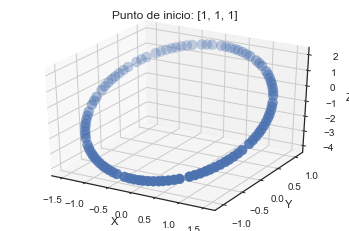

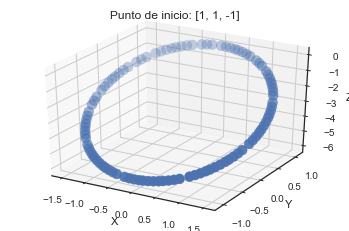

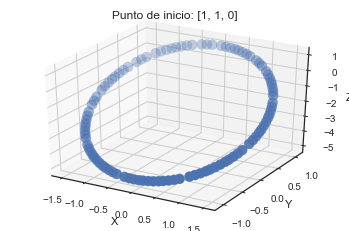

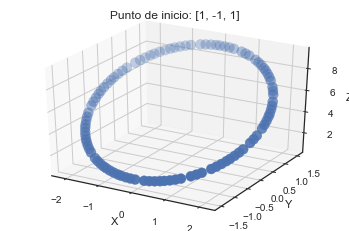

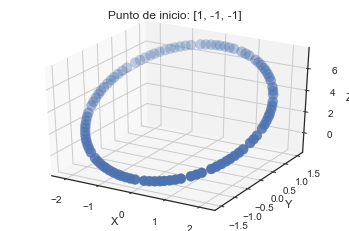

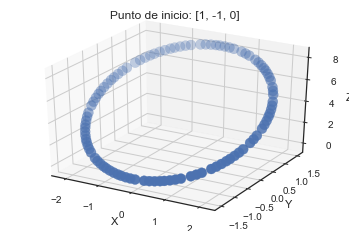

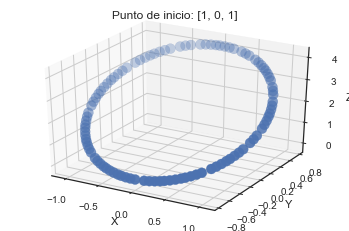

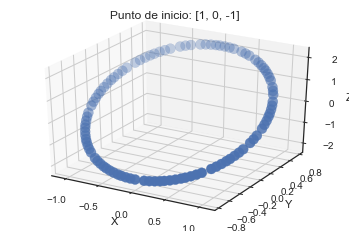

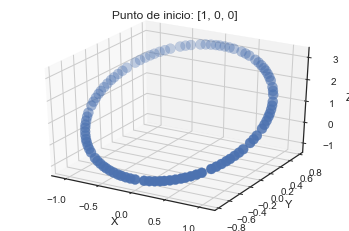

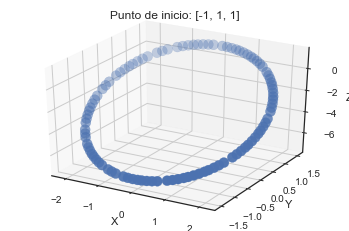

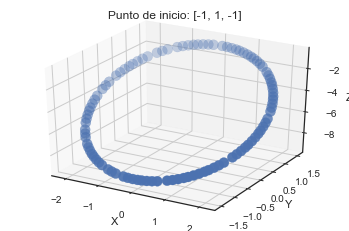

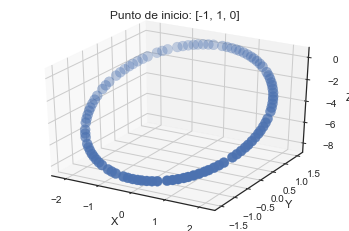

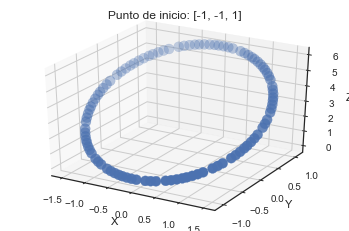

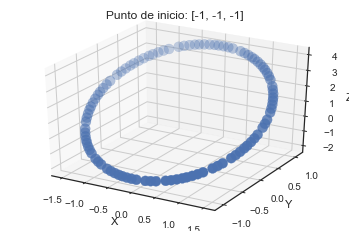

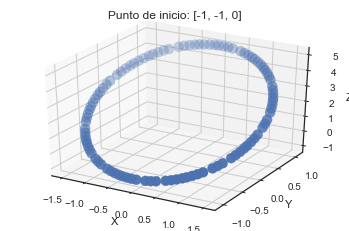

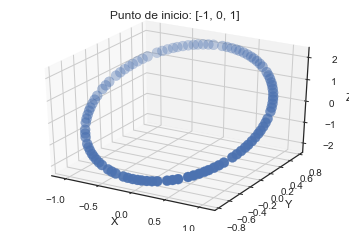

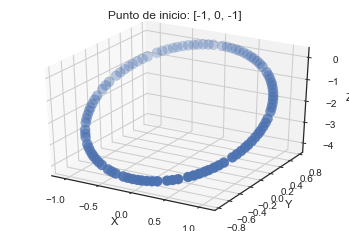

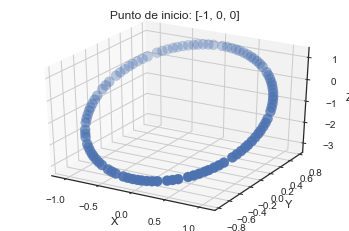

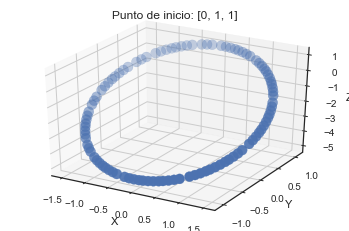

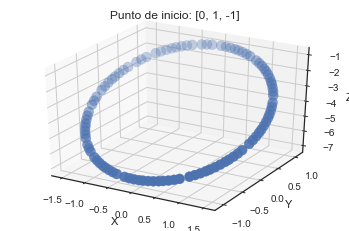

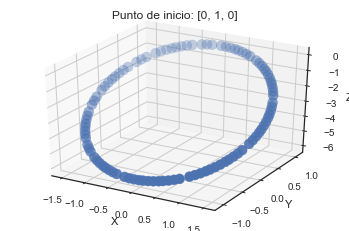

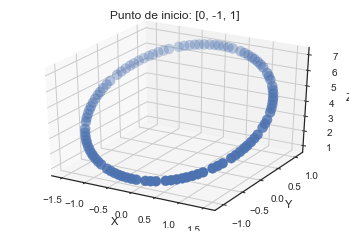

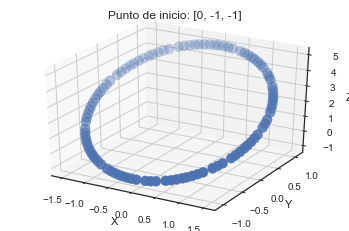

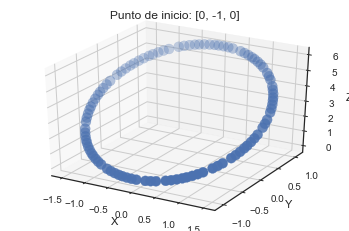

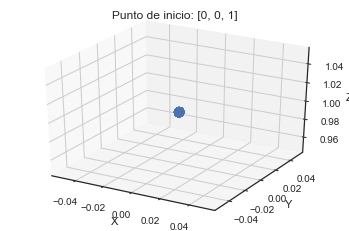

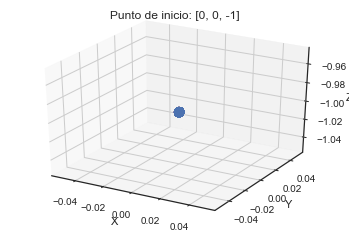

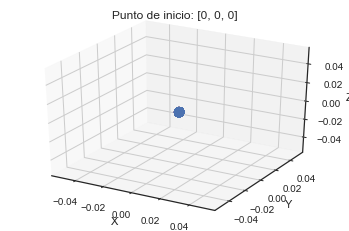

In [6]:
for i in range(len(points)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs[(i*100):((i+1)*100)], ys[(i*100):((i+1)*100)], zs[(i*100):((i+1)*100)], s=100, marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title("Punto de inicio: " + str(points[i]))
    plt.show()

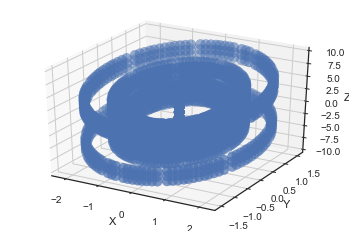

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, s=100, marker='o')

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

plt.show()

# Simpy

### Ejercicio 4

A un cajero automático (ATM) arriban clientes según una distribución exponencial con media que depende del horario según la siguiente tabla:

| Hora desde | Hora hasta  | Media (seg) 
|--|
| 10:00 | 12:00| 240
| 12:00 | 15:00| 120
| 15:00 | 19:00| 360

Los clientes se pueden dividir en tres tipos, y en función de ello es el tiempo que utilizan el cajero

| Tipo | Probabilidad  | Tiempo de proceso (min) 
|--|
| 1 | .1| 4 +/- 3
| 2 | .7| 2 +/- 1
| 3 | .2| 3 +/- 2

Determine:

* La cantidad máxima de personas en fila esperando a usar el ATM
* Tiempo máximo de espera en fila



In [8]:
simulation_time = 7*60*60
queue = 0
queue_max = 0
last_time_atention = 0
atention_max_time = 0


def get_lambda(env):
    if(env.now <= 2*60*60):
        return 1/240
    elif(env.now <= 5*60*60):
        return 1/120
    elif(env.now <= 7*60*60):
        return 1/360
    
    
def atention_duration():
    u = np.random.uniform()
    if(u <= 0.1):
        return np.random.uniform(1,7) * 60
    elif(u <= 0.8):
        return np.random.uniform(1,3) * 60
    return np.random.uniform(1,5) * 60
    
def cashier(env):
    global queue
    index = 1
    atm = simpy.Resource(env, capacity=1)
    while True:
        clients_arrival = random.expovariate(get_lambda(env))
        yield env.timeout(clients_arrival)
        print('llega un cliente')
        queue +=1
        print('cola en el cajero', queue)
        env.process(atention(env, index, atm))
        index +=1

def atention(env, index, atm):
    global queue, queue_max, last_time_atention, atention_max_time
    request = atm.request()
    yield request
    duration =  atention_duration()
    yield env.timeout(duration)
    atm.release(request)
    print('Termina de usar el cajero')
    
    #Chuequeo la cola maxima
    if queue > queue_max: queue_max = queue
    
    print('cola antes de atender al cliente:', queue)
    queue -= 1
    print("Cola despues de la atencion:", queue)
    
    #Chequeo la cantidad maxima de espera
    if (round(env.now/60, 2) - last_time_atention > atention_max_time):
        atention_max_time = round(env.now/60, 2) - last_time_atention
        last_time_atention = round(env.now/60, 2)
    
environment = simpy.Environment()
environment.process(cashier(environment))
environment.run(until=simulation_time)

print('\nLa cola maxima que se formo fue de ' + str(queue_max) + ' personas.')
print('El tiempo maximo de espera de un cliente en la fila fue ' + str(round(atention_max_time, 2)) + ' minutos.')

llega un cliente
cola en el cajero 1
Termina de usar el cajero
cola antes de atender al cliente: 1
Cola despues de la atencion: 0
llega un cliente
cola en el cajero 1
Termina de usar el cajero
cola antes de atender al cliente: 1
Cola despues de la atencion: 0
llega un cliente
cola en el cajero 1
Termina de usar el cajero
cola antes de atender al cliente: 1
Cola despues de la atencion: 0
llega un cliente
cola en el cajero 1
llega un cliente
cola en el cajero 2
Termina de usar el cajero
cola antes de atender al cliente: 2
Cola despues de la atencion: 1
llega un cliente
cola en el cajero 2
llega un cliente
cola en el cajero 3
Termina de usar el cajero
cola antes de atender al cliente: 3
Cola despues de la atencion: 2
Termina de usar el cajero
cola antes de atender al cliente: 2
Cola despues de la atencion: 1
llega un cliente
cola en el cajero 2
llega un cliente
cola en el cajero 3
Termina de usar el cajero
cola antes de atender al cliente: 3
Cola despues de la atencion: 2
llega un cliente

Cola despues de la atencion: 15
Termina de usar el cajero
cola antes de atender al cliente: 15
Cola despues de la atencion: 14
Termina de usar el cajero
cola antes de atender al cliente: 14
Cola despues de la atencion: 13
Termina de usar el cajero
cola antes de atender al cliente: 13
Cola despues de la atencion: 12
llega un cliente
cola en el cajero 13
Termina de usar el cajero
cola antes de atender al cliente: 13
Cola despues de la atencion: 12
llega un cliente
cola en el cajero 13
llega un cliente
cola en el cajero 14
Termina de usar el cajero
cola antes de atender al cliente: 14
Cola despues de la atencion: 13
llega un cliente
cola en el cajero 14
llega un cliente
cola en el cajero 15
Termina de usar el cajero
cola antes de atender al cliente: 15
Cola despues de la atencion: 14
Termina de usar el cajero
cola antes de atender al cliente: 14
Cola despues de la atencion: 13
llega un cliente
cola en el cajero 14
Termina de usar el cajero
cola antes de atender al cliente: 14
Cola despues

### Ejercicio 5

Siguiendo una distribución Exponencial negativa de media 45 ms arriban solicitudes a una granja de servidores, compuesta por 5 servidores y un balanceador de carga.

El tiempo de procesamiento de cada solicitud dependerá del tipo de solicitud que se trate:

| Tipo | Probabilidad  | Tiempo de proceso (mseg) 
|--|
| A | .7| 120 +/- 60
| B | .2| 240 +/- 120
| C | .1| 500 +/- 300

Se necesita determinar la mejor política de asignación de procesos a utilizar en el balanceador entre las siguientes:
* Cada solicitud recibida se asigna al servidor que esté desocupado, y de no haber alguno libre la asignación se hace al que posee menos solicitudes en cola de espera.
* Utilizando una política Round Robin (la primer solicitud se asigna al servidor 1, la segunda al 2, etc).
(Justifique la respuesta midiendo todos los indicadores que considere necesarios)

In [9]:
class Request(object):

    def __init__(self, env):
        self.env = env
        self.type = np.random.choice(['A', 'B', 'C'], p=[0.7, 0.2, 0.1])

    def process(self, farm):
        yield self.env.process(farm.serve(self))
        print("%.2f Request type %s attended" % (self.env.now, self.type))

    def get_process_duration(self):
        if(self.type == 'A'):
            return np.random.uniform(60,180)
        elif(self.type == 'B'):
            return np.random.uniform(120,360)
        return np.random.uniform(200,800)
    
class Farm(object):
    def __init__(self, env, count):
        self.env = env
        self.count = count
        self.servers = [simpy.Resource(env) for x in range(count)]
        self.queues_max = 0
        
    def serve(self, request):
        server = self.select_server()
        with server.request() as req:
            yield req
            yield self.env.timeout(request.get_process_duration())

    def select_server(self):
        queues = [0,0,0,0,0]
        servers_state = ['LIBRE','LIBRE','LIBRE','LIBRE','LIBRE']

        for i in range(len(self.servers)):
            server = self.servers[i]
            server_state = server.count
            if (server_state == 0) and (len(server.queue) == 0):
                print("Estado de servidores: " + str(servers_state))
                print(str(round(env.now, 2))+ "ms - Libre servidor: "+ str(i + 1) + " Colas: "+ str(queues))
                print("Servidor designado: " + str(i + 1))
                return server
            else:
                if(server_state == 1):
                    servers_state[i] = 'OCUPADO'
                queues[i]+=(len(server.queue))
                
        server_dessignated = np.array(queues).argmin()
        print("Estado de servidores: " + str(servers_state))
        print(str(round(env.now, 2))+ "ms - Libre servidor: "+ str(server_dessignated + 1) + " Colas: "+ str(queues))
        print("Servidor designado: " + str(server_dessignated + 1))
        
        if(np.amax(queues) > self.queues_max): 
            self.queues_max = np.amax(queues)
        
        return self.servers[server_dessignated]


In [10]:
request_count = 500
arrival_rate = 45
server_count = 5

def generate_request(environment, count, interval, farm):
    for i in range(count):
        request = Request(env)
        print(str(round(env.now, 2)) + "ms - Arribo de request tipo: "+request.type)
        environment.process(request.process(farm))
        t = random.expovariate(1.0 / interval)
        yield environment.timeout(t)


env = simpy.Environment()
farm = Farm(env, server_count)
env.process(generate_request(env, request_count, arrival_rate, farm))
env.run()


print("Largo máximo de cola: " + str(farm.queues_max))

0ms - Arribo de request tipo: A
Estado de servidores: ['LIBRE', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
0ms - Libre servidor: 1 Colas: [0, 0, 0, 0, 0]
Servidor designado: 1
10.76ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
10.76ms - Libre servidor: 2 Colas: [0, 0, 0, 0, 0]
Servidor designado: 2
97.25 Request type A attended
128.29ms - Arribo de request tipo: B
Estado de servidores: ['OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
128.29ms - Libre servidor: 2 Colas: [0, 0, 0, 0, 0]
Servidor designado: 2
128.5ms - Arribo de request tipo: C
Estado de servidores: ['OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE']
128.5ms - Libre servidor: 3 Colas: [0, 0, 0, 0, 0]
Servidor designado: 3
147.17ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE']
147.17ms - Libre servidor: 4 Colas: [0, 0, 0, 0, 0]
Servidor designado: 4
153.99ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCU

5936.49ms - Libre servidor: 4 Colas: [1, 1, 1, 0, 0]
Servidor designado: 4
5943.25 Request type A attended
5973.21 Request type A attended
5995.81ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE']
5995.81ms - Libre servidor: 5 Colas: [1, 0, 1, 1, 0]
Servidor designado: 5
6000.47ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
6000.47ms - Libre servidor: 2 Colas: [1, 0, 1, 1, 0]
Servidor designado: 2
6016.57 Request type C attended
6047.19ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
6047.19ms - Libre servidor: 3 Colas: [1, 1, 0, 1, 0]
Servidor designado: 3
6088.16 Request type A attended
6148.39ms - Arribo de request tipo: B
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE']
6148.39ms - Libre servidor: 5 Colas: [1, 1, 1, 1, 0]
Servidor designado: 5
6152.38 Request type A attended
6168.

Servidor designado: 3
9530.34ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9530.34ms - Libre servidor: 4 Colas: [1, 1, 1, 0, 1]
Servidor designado: 4
9547.3ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9547.3ms - Libre servidor: 1 Colas: [1, 1, 1, 1, 1]
Servidor designado: 1
9549.44 Request type A attended
9569.11ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9569.11ms - Libre servidor: 3 Colas: [2, 1, 0, 1, 1]
Servidor designado: 3
9573.73 Request type A attended
9582.10 Request type A attended
9583.57 Request type A attended
9605.77ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9605.77ms - Libre servidor: 2 Colas: [2, 0, 1, 0, 0]
Servidor designado: 2
9630.77ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUP

12159.05 Request type B attended
12200.75 Request type A attended
12209.58 Request type B attended
12227.06 Request type A attended
12239.51ms - Arribo de request tipo: A
Estado de servidores: ['LIBRE', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
12239.51ms - Libre servidor: 1 Colas: [0, 0, 0, 0, 0]
Servidor designado: 1
12247.76 Request type A attended
12269.7ms - Arribo de request tipo: B
Estado de servidores: ['OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
12269.7ms - Libre servidor: 2 Colas: [0, 0, 0, 0, 0]
Servidor designado: 2
12299.25 Request type A attended
12300.4ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE']
12300.4ms - Libre servidor: 3 Colas: [0, 0, 0, 0, 0]
Servidor designado: 3
12346.64 Request type A attended
12357.08ms - Arribo de request tipo: A
Estado de servidores: ['LIBRE', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
12357.08ms - Libre servidor: 1 Colas: [0, 0, 0, 0, 0]
Servidor designado: 1
12420.63 Request type B attended
12

15674.67ms - Arribo de request tipo: B
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
15674.67ms - Libre servidor: 2 Colas: [1, 0, 0, 1, 0]
Servidor designado: 2
15735.62ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
15735.62ms - Libre servidor: 3 Colas: [1, 1, 0, 1, 0]
Servidor designado: 3
15738.34 Request type A attended
15738.41 Request type A attended
15776.7ms - Arribo de request tipo: B
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE']
15776.7ms - Libre servidor: 5 Colas: [1, 1, 0, 1, 0]
Servidor designado: 5
15785.08 Request type A attended
15786.84ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
15786.84ms - Libre servidor: 2 Colas: [1, 0, 0, 1, 0]
Servidor designado: 2
15810.49 Request type C attended
15852.16ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUP